In [339]:
!pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: D:\Netflix\venv\Scripts\python.exe -m pip install --upgrade pip


In [340]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: D:\Netflix\venv\Scripts\python.exe -m pip install --upgrade pip


In [341]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
plt.style.use('dark_background')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [344]:
netflix_info = pd.read_csv('netflix_titles.csv')

In [345]:
netflix_info.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [346]:
netflix_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [347]:
netflix_info.drop_duplicates(inplace=True)

In [348]:
netflix_info.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [349]:
netflix_info[['director', 'cast']] = netflix_info[['director', 'cast']].fillna('Unknown')

In [350]:
netflix_info['country'] = netflix_info['country'].fillna(netflix_info['country'].mode()[0])

In [351]:
netflix_info.dropna(inplace=True)

In [352]:
netflix_info['date_added'] = netflix_info['date_added'].str.strip()
netflix_info['date_added'] = pd.to_datetime(netflix_info['date_added'])

In [353]:
netflix_info['year_added'] = netflix_info['date_added'].dt.year
netflix_info['month_name_added'] = netflix_info['date_added'].dt.month_name()
netflix_info['month_added'] = netflix_info['date_added'].dt.month

In [354]:
netflix_info = netflix_info[netflix_info['release_year'] <= netflix_info['year_added']]

In [355]:
netflix_info.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,9


In [356]:
netflix_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8776 non-null   object        
 1   type              8776 non-null   object        
 2   title             8776 non-null   object        
 3   director          8776 non-null   object        
 4   cast              8776 non-null   object        
 5   country           8776 non-null   object        
 6   date_added        8776 non-null   datetime64[ns]
 7   release_year      8776 non-null   int64         
 8   rating            8776 non-null   object        
 9   duration          8776 non-null   object        
 10  listed_in         8776 non-null   object        
 11  description       8776 non-null   object        
 12  year_added        8776 non-null   int32         
 13  month_name_added  8776 non-null   object        
 14  month_added       8776 non-nu

In [357]:
netflix_info.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_name_added    0
month_added         0
dtype: int64

In [358]:
netflix_info['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Text(0, 0.5, 'Количество')

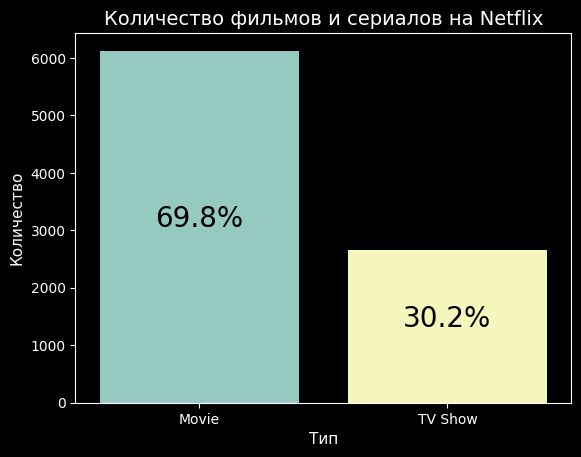

In [359]:
count_type_plot = sns.countplot(x='type', hue='type', data=netflix_info)

for p in count_type_plot.patches:
    count = p.get_height()
    percentage = count/len(netflix_info) * 100
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height()
    count_type_plot.annotate(f'{percentage:.1f}%', (x, y/2), ha='center', color='black' ,fontsize=20)

plt.title('Количество фильмов и сериалов на Netflix', fontsize=14)
plt.xlabel('Тип', fontsize=11)
plt.ylabel('Количество', fontsize=11)

Netflix делает акциент на фильмах, так как они составляют приблизительно 2/3 всей библиотеки (69,8%), в то время как телесериалы занимают приблизительно 1/3 (30,2%).

In [360]:
number_type_by_years = netflix_info.groupby(['year_added', 'type'], as_index=False).size()
number_type_by_years.rename(columns={'size':'count'}, inplace=True)
number_type_by_years

,year_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,4
8,2014,Movie,19
9,2014,TV Show,5


Text(0, 0.5, 'Количество')

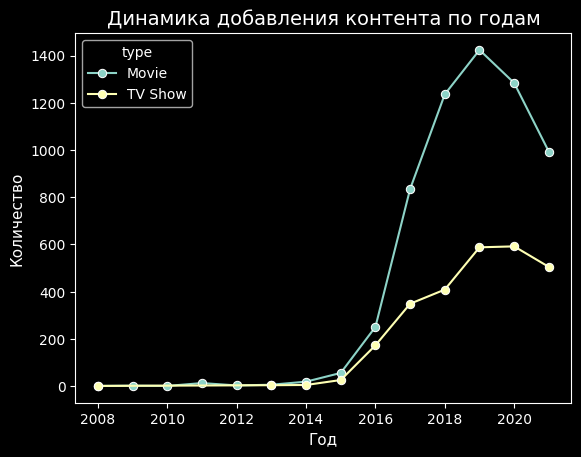

In [361]:
number_type_by_years_plot = sns.lineplot(x='year_added', y='count', hue='type', data=number_type_by_years, marker='o')
number_type_by_years_plot
plt.title('Динамика добавления контента по годам', fontsize=14)
plt.xlabel('Год', fontsize=11)
plt.ylabel('Количество', fontsize=11)

С 2014–2015 годов наблюдается стремительный рост как фильмов, так и сериалов на платформе Netflix. Этот рост связан с переходом компании к стратегии активного производства собственного контента. Уже в 2013 году Netflix запустил первые оригинальные проекты, такие как House of Cards и Orange Is the New Black, которые стали отправной точкой новой политики. Начиная с 2015 года, компания значительно увеличила инвестиции в оригинальный контент, выпустив более десятка новых шоу, включая Daredevil, Narcos и Jessica Jones.

Параллельно происходила географическая экспансия: если до 2014 года Netflix был представлен преимущественно в США, Канаде, Латинской Америке и Великобритании, то в 2014–2015 годах он начал активно осваивать европейский рынок. К 2016 году сервис стал доступен сразу в 130 странах, что стало ключевым этапом его глобального расширения и стимулировало дальнейший рост библиотеки контента.

In [362]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [363]:
content_per_year_and_month = netflix_info.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T
content_per_year_and_month

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name_added,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,71.0,129.0,153.0,205.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,86.0,148.0,113.0,109.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,17.0,124.0,173.0,172.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,92.0,115.0,162.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,95.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,78.0,152.0,157.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,115.0,164.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,113.0,124.0,123.0,168.0,183.0


Text(50.72222222222221, 0.5, 'месяц')

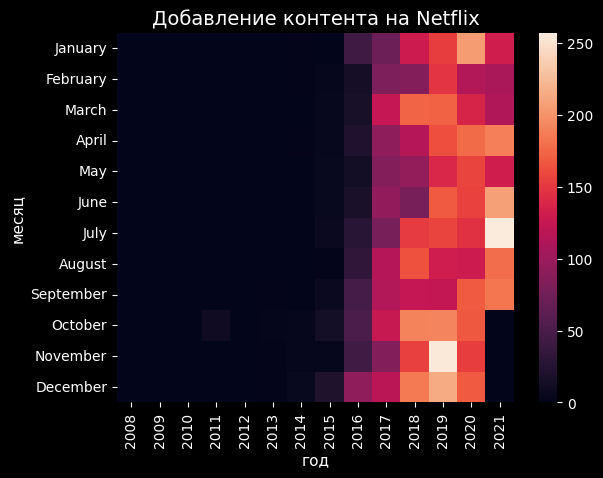

In [364]:
sns.heatmap(data=content_per_year_and_month)
plt.title('Добавление контента на Netflix', fontsize=14)
plt.xlabel('год', fontsize=11)
plt.ylabel('месяц', fontsize=11)

В первые годы (с 2008 - 2014) Netflix добавлял малое количество фильмов и сериалов. С 2017 года стремительное увеличесение контента практически каждый месяц, особо выделяются март и октябрь. В 2019 году самым насыщенным месяцем по добавлению контента является ноябрь. В 2020-2021 году по сравнению с предыдущими годами наблюдается небольшое снижение активности, вероятно, связанное с вспышкой COVID-19, который затронул многие производственные процессы по всему миру.

In [365]:
movies = netflix_info[netflix_info['type']=='Movie'].copy()
tv_show = netflix_info[netflix_info['type']=='TV Show'].copy()

Text(0, 0.5, 'Возрастной рейтинг')

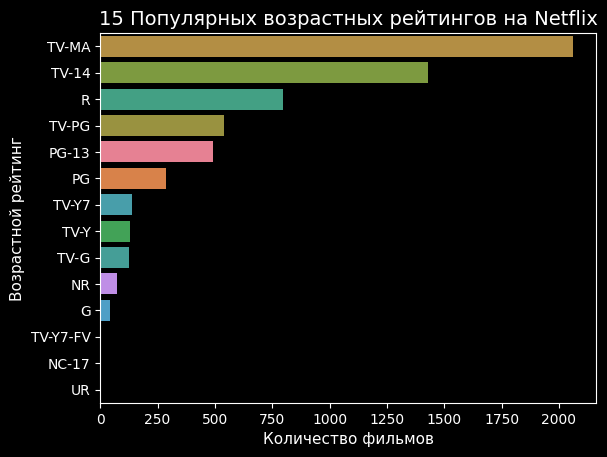

In [366]:
sns.countplot(y='rating', hue='rating', data=movies, order=movies['rating'].value_counts().index[0:15])
plt.title('15 Популярных возрастных рейтингов на Netflix', fontsize=14)
plt.xlabel('Количество фильмов', fontsize=11)
plt.ylabel('Возрастной рейтинг', fontsize=11)

Text(0, 0.5, 'Возрастной рейтинг')

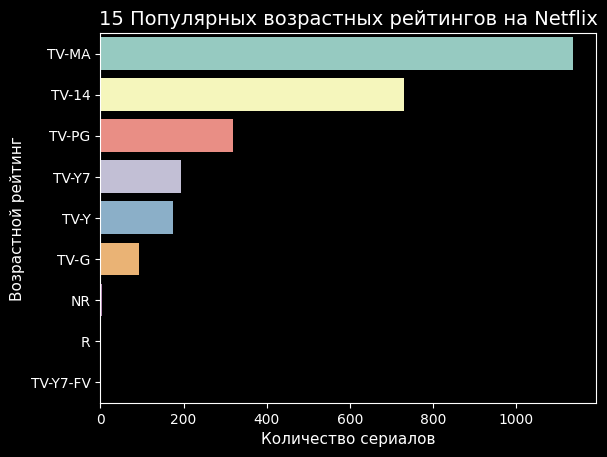

In [367]:
sns.countplot(y='rating', hue='rating', data=tv_show, order=tv_show['rating'].value_counts().index[0:15])
plt.title('15 Популярных возрастных рейтингов на Netflix', fontsize=14)
plt.xlabel('Количество сериалов', fontsize=11)
plt.ylabel('Возрастной рейтинг', fontsize=11)

Для фильмов и сериалов самым популярным рейтингом является TV-MA, предназначенный только для взрослых. На втором месте TV-14, который рекомендуется зрителям старше 14 лет. На третьем месте для фильмов R, который предназначен только для взрослых, дети могут допускаться с родителями. Для сериалов на третьем месте TV-PG, для которого желателен родительский контроль.

In [368]:
netflix_info['year_diff'] = netflix_info['year_added'] - netflix_info['release_year']

In [369]:
netflix_info['year_diff'].describe()

count    8776.000000
mean        4.699863
std         8.793843
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: year_diff, dtype: float64

Text(0, 0.5, 'Количество контента')

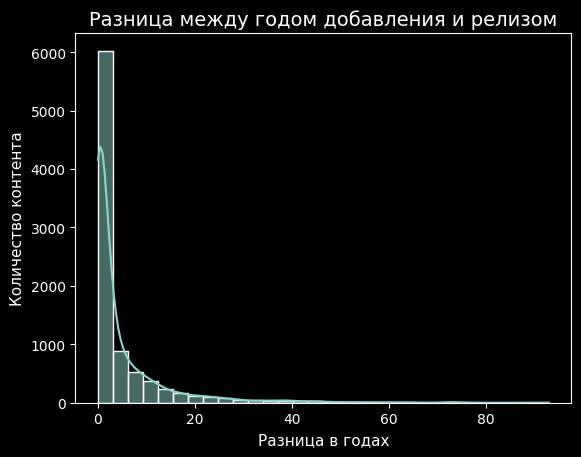

In [370]:
sns.histplot(netflix_info['year_diff'], bins=30, kde=True)
plt.title('Разница между годом добавления и релизом', fontsize=14)
plt.xlabel('Разница в годах', fontsize=11)
plt.ylabel('Количество контента', fontsize=11)

50% контента появляются на Netflix в течении 1 года после релиза. 75% контента попадает на Netflix не позже 5 лет

In [371]:
netflix_info.groupby('type')['year_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Movie,6124.0,5.733181,9.746585,0.0,0.0,2.0,7.0,75.0
TV Show,2652.0,2.313725,5.329115,0.0,0.0,0.0,2.0,93.0


Сериалы добавляются на Netflix с меньшей задержкой по сравнению с фильмами. Так, не менее 50% фильмов добавляются не позднее 2 лет, а не менее 75% фильмов попадает на Netflix не позднее 7 лет. В то время как не менее 75% сериалов попадают на Netflix не позднее 2 лет.

Text(0, 0.5, 'Количество')

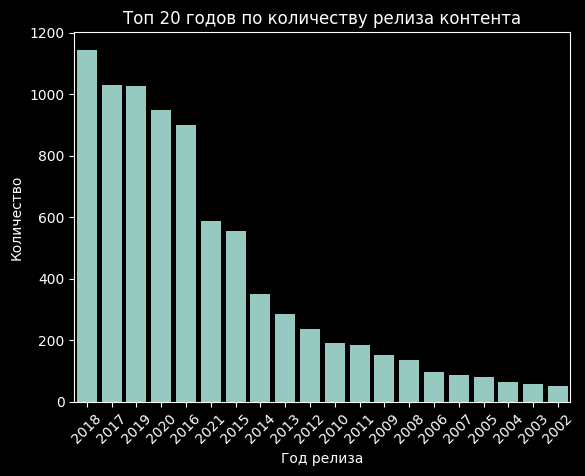

In [372]:
sns.countplot(x='release_year', data=netflix_info, order=netflix_info['release_year'].value_counts().index[:20])
plt.xticks(rotation=45);
plt.title('Топ 20 годов по количеству релиза контента')
plt.xlabel('Год релиза')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

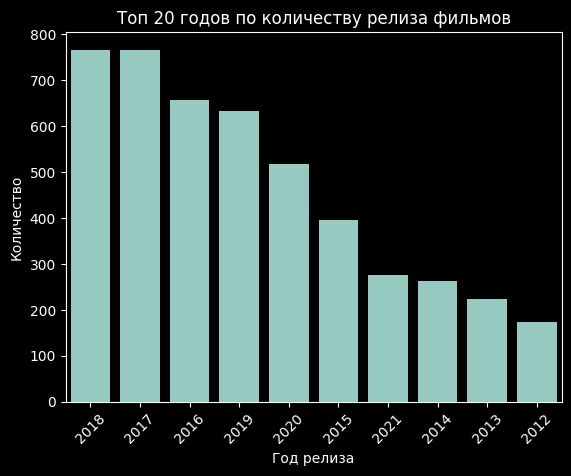

In [373]:
sns.countplot(x='release_year', data=movies, order=movies['release_year'].value_counts().index[:10])
plt.xticks(rotation=45);
plt.title('Топ 20 годов по количеству релиза фильмов')
plt.xlabel('Год релиза')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

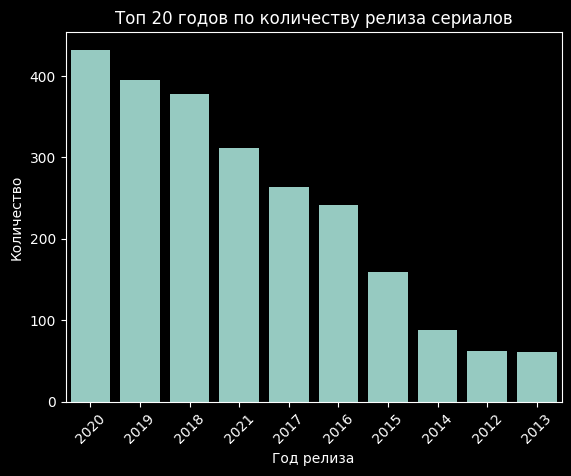

In [374]:
sns.countplot(x='release_year', data=tv_show, order=tv_show['release_year'].value_counts().index[:10])
plt.xticks(rotation=45);
plt.title('Топ 20 годов по количеству релиза сериалов')
plt.xlabel('Год релиза')
plt.ylabel('Количество')

В 2018 году платформа достигла максимума по объёму нового контента. Наибольшее число фильмов было добавлено в 2017–2018 годах, тогда как 2020 год стал лидером по выпуску сериалов. Эти сдвиги могут отражать адаптацию стратегий контентного планирования к изменяющимся пользовательским предпочтениям к длительным форматам просмотра.

In [375]:
number_contens_by_country = netflix_info.groupby('country').size().sort_values(ascending=False)
number_contens_by_country

country
United States                                     3632
India                                              972
United Kingdom                                     418
Japan                                              243
South Korea                                        199
                                                  ... 
Venezuela                                            1
Venezuela, Colombia                                  1
Czech Republic, Slovakia                             1
West Germany                                         1
United States, United Kingdom, Denmark, Sweden       1
Length: 745, dtype: int64

Text(0, 0.5, 'страна')

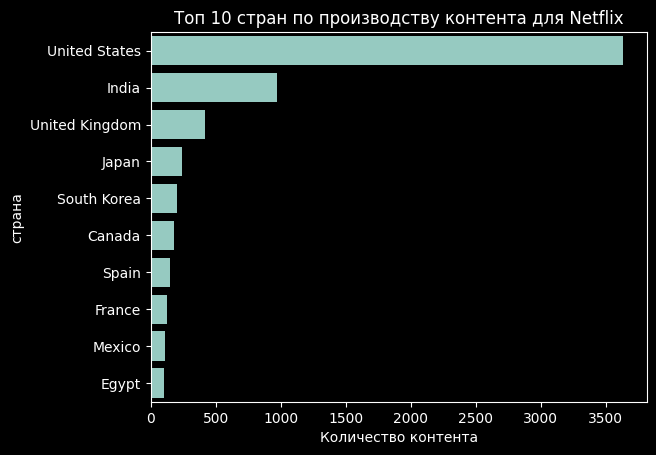

In [376]:
sns.countplot(y='country', data=netflix_info, order=netflix_info['country'].value_counts().index[:10])
plt.title('Топ 10 стран по производству контента для Netflix')
plt.xlabel('Количество контента')
plt.ylabel('страна')

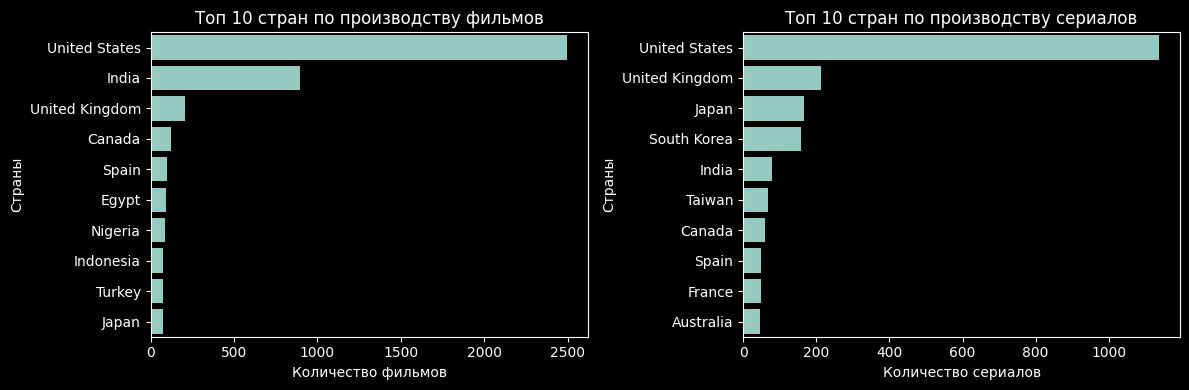

In [377]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(y='country', data=movies, order=movies['country'].value_counts().index[:10], orient='v', ax=axes[0])
sns.countplot(y='country', data=tv_show, order=tv_show['country'].value_counts().index[:10], orient='v', ax=axes[1])
axes[0].set_title('Топ 10 стран по производству фильмов')
axes[0].set_ylabel('Страны')
axes[0].set_xlabel('Количество фильмов')
axes[1].set_title('Топ 10 стран по производству сериалов')
axes[1].set_ylabel('Страны')
axes[1].set_xlabel('Количество сериалов')

plt.tight_layout()

<Axes: xlabel='type', ylabel='country'>

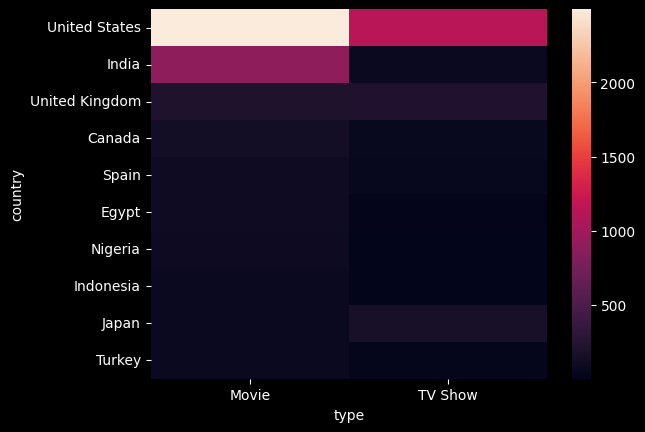

In [378]:
country_content = netflix_info.groupby(['country', 'type']).size().unstack().fillna(0)
sns.heatmap(country_content.sort_values(by=['Movie', 'TV Show'], ascending=[False, False]).head(10))


Большая часть контента на платформе представлена продукцией США. Индия также входит в число ведущих стран по объёму созданных фильмов, тогда как Великобритания лидирует по числу произведённых сериалов.

In [379]:
movies['duration'] = movies['duration'].str.replace(' min', '')

In [380]:
movies['duration'] = movies['duration'].astype('int')
movies['duration'].head()

0      90
6      91
7     125
9     104
12    127
Name: duration, dtype: int64

Text(0, 0.5, '')

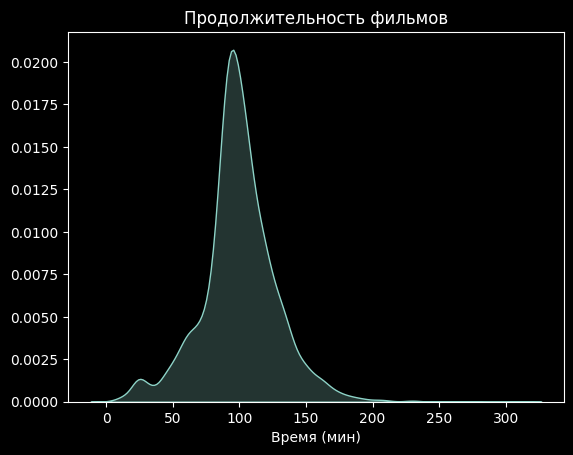

In [381]:
sns.kdeplot(x='duration', data=movies, fill=True)
plt.title('Продолжительность фильмов')
plt.xlabel('Время (мин)')
plt.ylabel('')

In [382]:
movies['duration'].describe()

count    6124.000000
mean       99.588831
std        28.286987
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [383]:
movies[(movies['duration'] == movies['duration'].min()) | (movies['duration'] == movies['duration'].max())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name_added,month_added
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019,June,6
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,December,12


In [384]:
top_10_movies = movies[['duration', 'title']].sort_values(by='duration', ascending=False)[:10]
top_10_movies

,duration,title
4253,312,Black Mirror: Bandersnatch
717,273,Headspace: Unwind Your Mind
2491,253,The School of Mischief
2487,237,No Longer kids
2484,233,Lock Your Girls In
2488,230,Raya and Sakina
166,229,Once Upon a Time in America
7932,228,Sangam
1019,224,Lagaan
4573,214,Jodhaa Akbar


Text(0, 0.5, 'фильм')

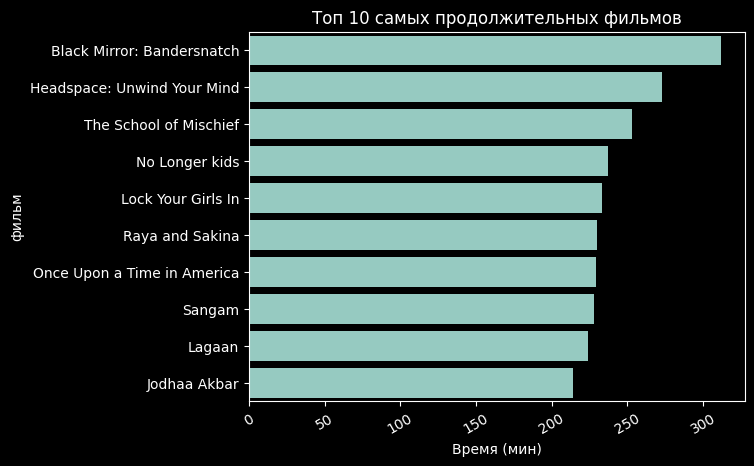

In [385]:
sns.barplot(y='title', x='duration', data=top_10_movies)
plt.xticks(rotation=30)
plt.title('Топ 10 самых продолжительных фильмов')
plt.xlabel('Время (мин)')
plt.ylabel('фильм')

В среднем продолжительность фильмов составляет около 98 минут, при этом 50% фильмов длятся от 87 до 114 минут. Самый короткий фильм — «Silent», снятый в 2014 году в США, длился всего 3 минуты. Самым продолжительным является «Black Mirror: Bandersnatch» (2018, США) с длительностью 312 минут.

In [386]:
tv_show['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [387]:
tv_show['duration'] = tv_show['duration'].str.extract(r'(\d+)', expand=False)

In [388]:
tv_show['duration'] = tv_show['duration'].astype('int')
tv_show['duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2652, dtype: int64

Text(0, 0.5, '')

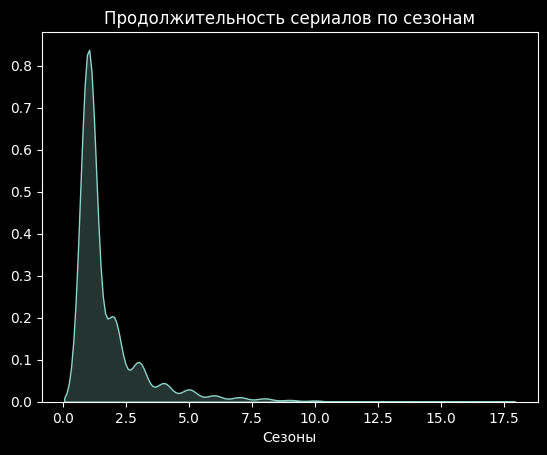

In [389]:
sns.kdeplot(x='duration', data=tv_show, fill=True);
plt.title('Продолжительность сериалов по сезонам')
plt.xlabel('Сезоны')
plt.ylabel('')

In [390]:
tv_show['duration'].describe()

count    2652.000000
mean        1.747738
std         1.548443
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [391]:
tv_show[tv_show['duration'] == tv_show['duration'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name_added,month_added
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,July,7


In [392]:
top_10_tv_show = tv_show[['duration', 'title']].sort_values(by='duration', ascending=False)[:10]

Text(0, 0.5, 'сериал')

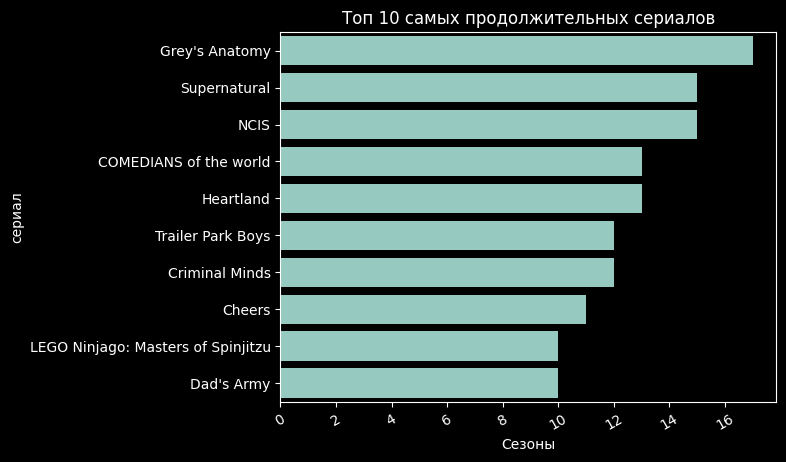

In [393]:
sns.barplot(y='title', x='duration', data=top_10_tv_show)
plt.xticks(rotation=30)
plt.title('Топ 10 самых продолжительных сериалов')
plt.xlabel('Сезоны')
plt.ylabel('сериал')

В основном сериалы выпускаются по 1-2 сезона. Самым продолжительным по количеству сезонов является сериал 'Анатомия страсти' (Grey's Anatomy), выпущенный в США в 2020 году, который насчитывает 17 сезонов.

In [394]:
netflix_info.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_name_added,month_added,year_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,9,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,9,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,9,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,9,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,9,0


In [395]:
directors_movies = movies.groupby('director').size().sort_values(ascending=False)[1:15]
directors_movies

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Troy Miller                8
Fernando Ayllón            8
dtype: int64

Text(0, 0.5, 'режссер')

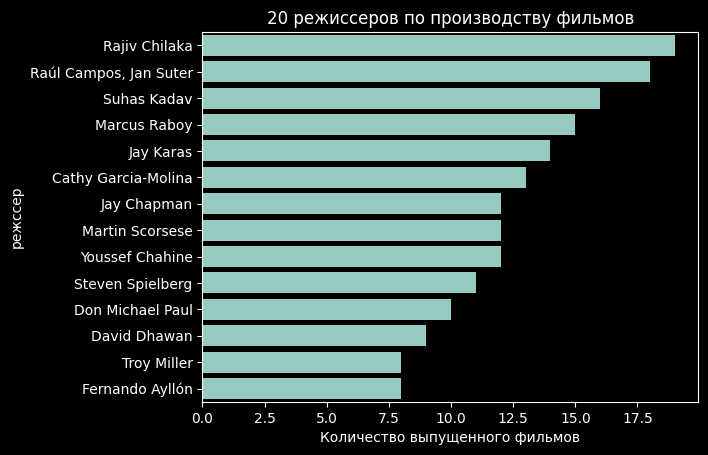

In [396]:
sns.barplot(y=directors_movies.index, x=directors_movies.values)
plt.title('20 режиссеров по производству фильмов')
plt.xlabel('Количество выпущенного фильмов')
plt.ylabel('режссер')

In [397]:
directors_tv = tv_show.groupby('director').size().sort_values(ascending=False)[1:15]
directors_tv

director
Alastair Fothergill                      3
Iginio Straffi                           2
Shin Won-ho                              2
Ken Burns                                2
Hsu Fu-chun                              2
Stan Lathan                              2
Rob Seidenglanz                          2
Alessandro Angulo                        1
Alejandro Lozano                         1
Alejandro Hartmann                       1
Ah Loong                                 1
Adrián García Bogliano                   1
Adrien Lagier, Ousmane Ly                1
Andrucha Waddington, Pedro Waddington    1
dtype: int64

Text(0, 0.5, 'режссеры')

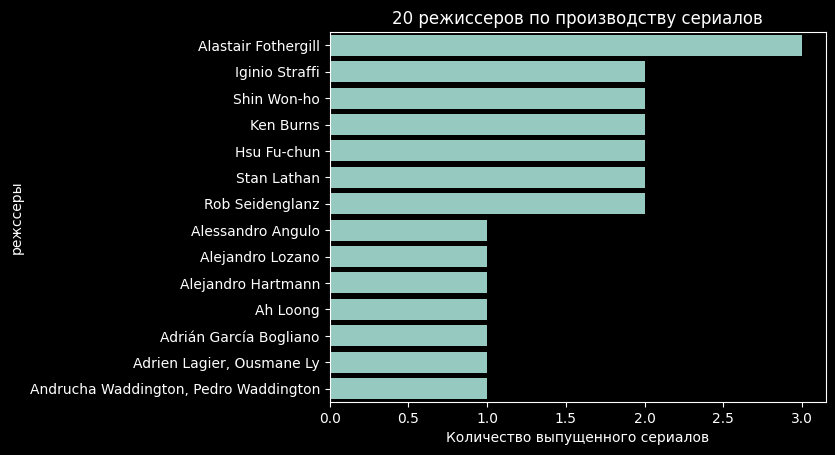

In [398]:
sns.barplot(y=directors_tv.index, x=directors_tv.values)
plt.title('20 режиссеров по производству сериалов')
plt.xlabel('Количество выпущенного сериалов')
plt.ylabel('режссеры')

Лидером по количеству созданных фильмов является Rajiv Chilaka (19 фильмов), за ним следуют Raúl Campos вместе с Jan Suter (18), а также Suhas Kadav (16). Самое большое количество сериалов у Alastair Fothergill (3 сериала). Большинство остальных режиссёров имеют по 1-2 сериала.

Text(0, 0.5, 'Жанры')

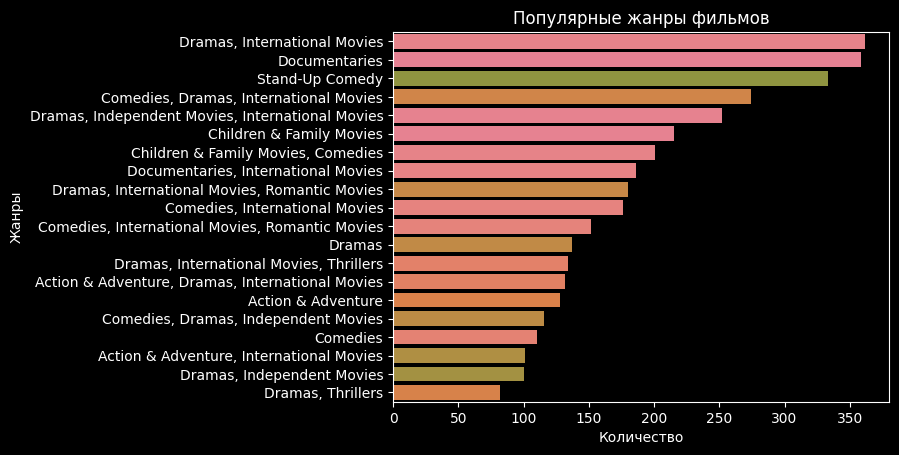

In [399]:
sns.countplot(y='listed_in', hue='listed_in', data=movies, order=movies['listed_in'].value_counts().index[:20])
plt.title('Популярные жанры фильмов')
plt.xlabel('Количество')
plt.ylabel('Жанры')

Text(0, 0.5, 'Жанры')

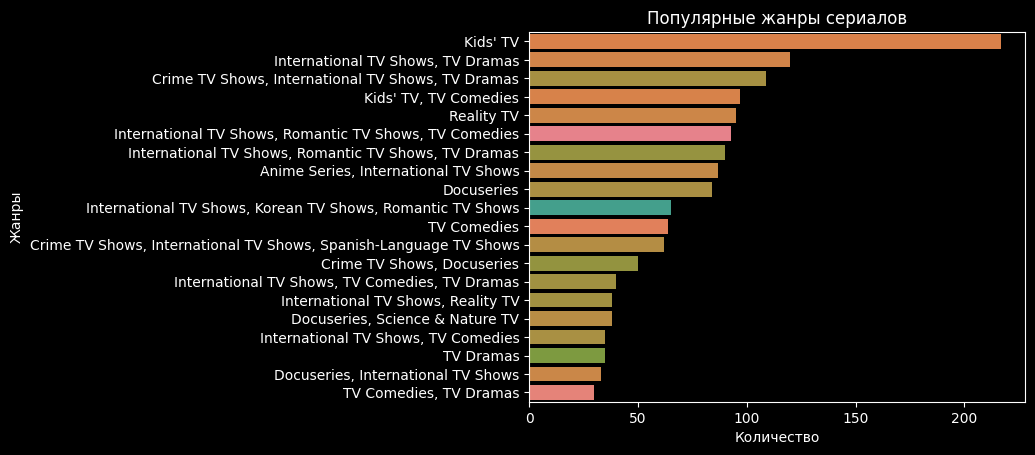

In [400]:
sns.countplot(y='listed_in', hue='listed_in', data=tv_show, order=tv_show['listed_in'].value_counts().index[:20])
plt.title('Популярные жанры сериалов')
plt.xlabel('Количество')
plt.ylabel('Жанры')

В категории фильмов лидируют драмы, особенно с международным уклоном, по количеству произведений. За ними идут документальные фильмы и комедии.
В сериалах основное внимание уделяется детским передачам, а также популярны международные сериалы, драмы и криминальные истории.